# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [107]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [108]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
    
for i, city in enumerate(cities):

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    city_url = url + "&q=" + city.replace(" ", "+")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas


Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | kavaratti
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | brookings
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | kapa'a
Processing Record 10 of Set 1 | wau
Processing Record 11 of Set 1 | tahla
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | parham
Processing Record 14 of Set 1 | fortuna
Processing Record 15 of Set 1 | toga village
City not found. Skipping...
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | itapirapua
Processing Record 18 of Set 1 | barwadih
Processing Record 19 of Set 1 | kingston
Processing Record 20 of Set 1 | kone
Processing Record 21 of Set 1 | udachny
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | grytviken
Processing Record 24 of Set 1 | waingapu
Proces

In [109]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [110]:
# Display sample data
city_data_df['Max Temp'] = (5/9) * (city_data_df['Max Temp'] - 32)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,18.261111,70,87,11.65,SH,1707404063
1,wailua homesteads,22.0669,-159.3780,22.438889,78,0,13.80,US,1707404063
2,puerto natales,-51.7236,-72.4875,13.250000,50,75,28.77,CL,1707404063
3,kavaratti,10.5669,72.6420,28.388889,73,3,6.38,IN,1707404063
4,bilibino,68.0546,166.4372,-31.600000,100,99,0.65,RU,1707404063


In [111]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [112]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,18.261111,70,87,11.65,SH,1707404063
1,wailua homesteads,22.0669,-159.3780,22.438889,78,0,13.80,US,1707404063
2,puerto natales,-51.7236,-72.4875,13.250000,50,75,28.77,CL,1707404063
3,kavaratti,10.5669,72.6420,28.388889,73,3,6.38,IN,1707404063
4,bilibino,68.0546,166.4372,-31.600000,100,99,0.65,RU,1707404063


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

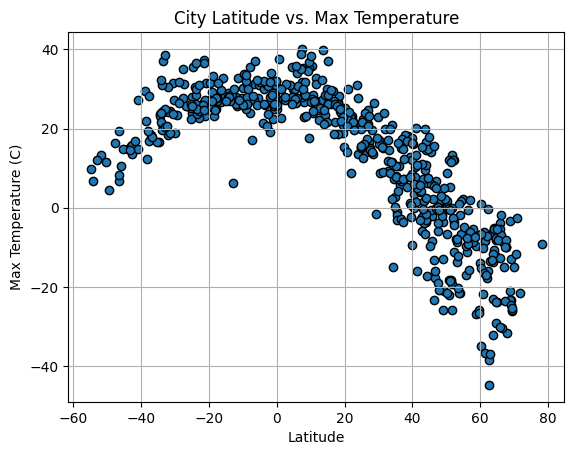

In [113]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(lat, temp, edgecolors= 'black')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

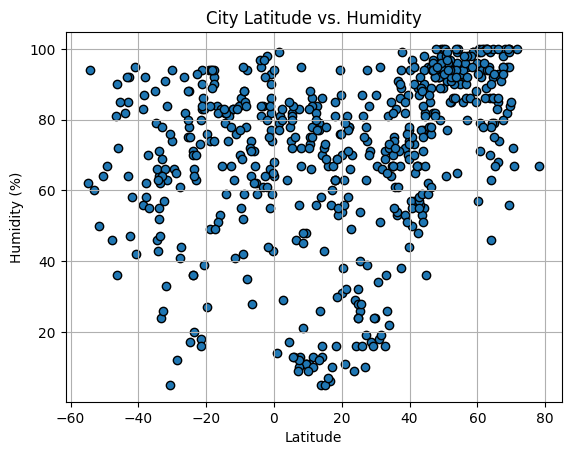

In [114]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(lat, humidity, edgecolors= 'black')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

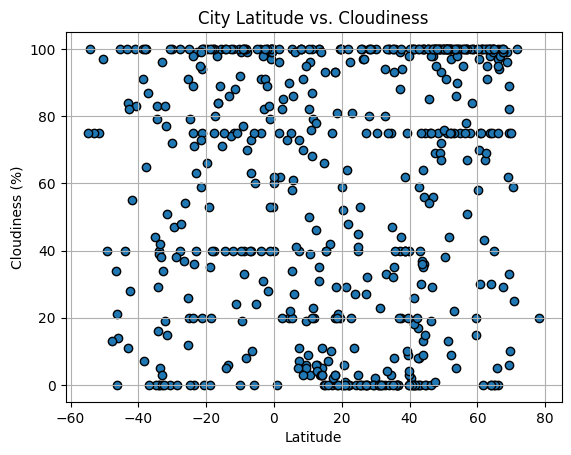

In [115]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df['Lat']
clouds = city_data_df['Cloudiness']
plt.scatter(lat, clouds, edgecolors= 'black')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

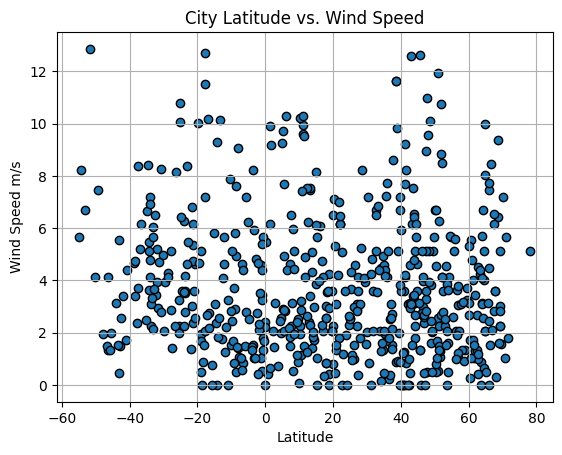

In [116]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df['Lat']
wind = city_data_df['Wind Speed']
wind = (wind * .44704)
plt.scatter(lat, wind, edgecolors= 'black')

# Incorporate the other graph properties
plt.grid()
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [117]:
# Define a function to create Linear Regression plots
def linreg(x_values, y_values, yaxis, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(yaxis)
    print(f"The r-value is: {rvalue}")

In [118]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']> 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wailua homesteads,22.0669,-159.3780,22.438889,78,0,13.80,US,1707404063
3,kavaratti,10.5669,72.6420,28.388889,73,3,6.38,IN,1707404063
4,bilibino,68.0546,166.4372,-31.600000,100,99,0.65,RU,1707404063
6,brookings,44.3114,-96.7984,6.322222,90,100,11.50,US,1707403960
7,hawaiian paradise park,19.5933,-154.9731,18.827778,94,20,8.05,US,1707404063


In [119]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,18.261111,70,87,11.65,SH,1707404063
2,puerto natales,-51.7236,-72.4875,13.250000,50,75,28.77,CL,1707404063
5,adamstown,-25.0660,-130.1015,23.927778,88,100,22.50,PN,1707404063
11,blackmans bay,-43.0167,147.3167,15.072222,85,84,1.01,AU,1707404064
15,itapirapua,-15.8233,-50.6133,32.722222,53,89,1.74,BR,1707404064


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8831601116745685


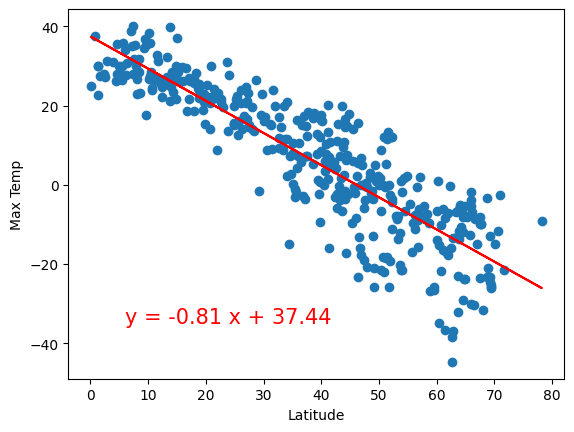

In [130]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linreg(x_values, y_values, 'Max Temp', (6, -35))

The r-value is: 0.5995668054470931


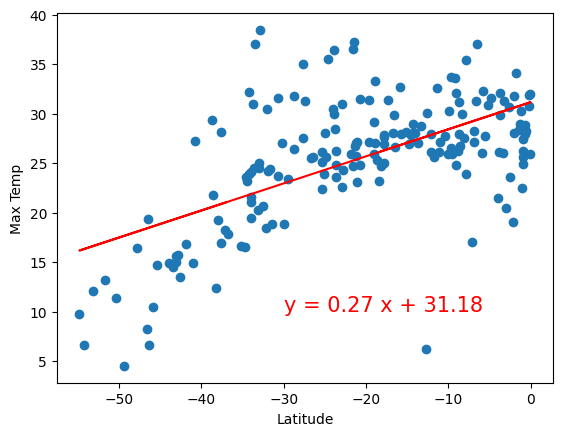

In [131]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linreg(x_values, y_values, 'Max Temp', (-30, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.5401952829084563


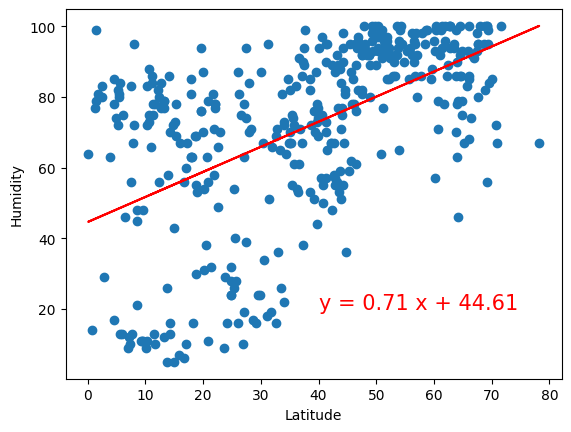

In [134]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linreg(x_values, y_values, 'Humidity', (40, 20))

The r-value is: 0.15649913245116873


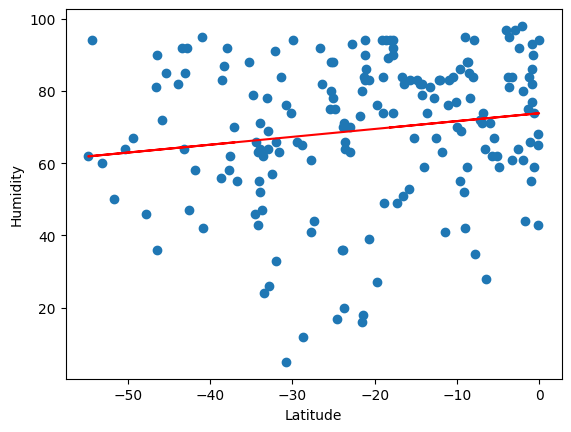

In [135]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linreg(x_values, y_values, 'Humidity', (40, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.29376263650348877


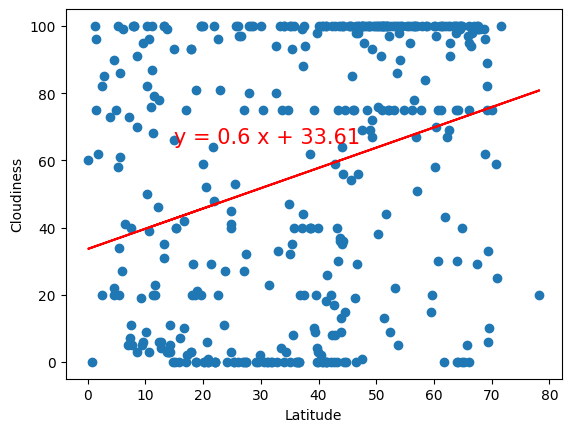

In [146]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linreg(x_values, y_values, 'Cloudiness', (15, 65))

The r-value is: 0.2219366625903861


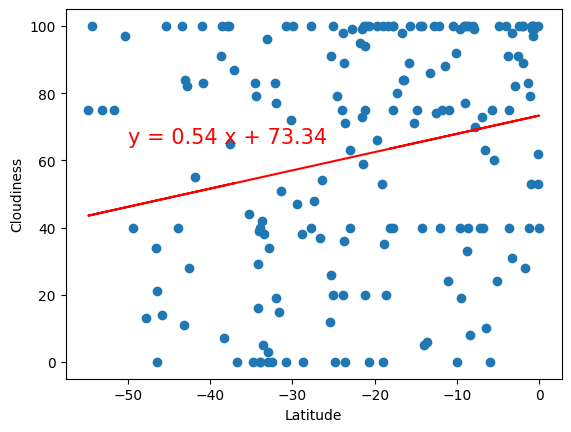

In [149]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linreg(x_values, y_values, 'Cloudiness', (-50, 65))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.04433517733404446


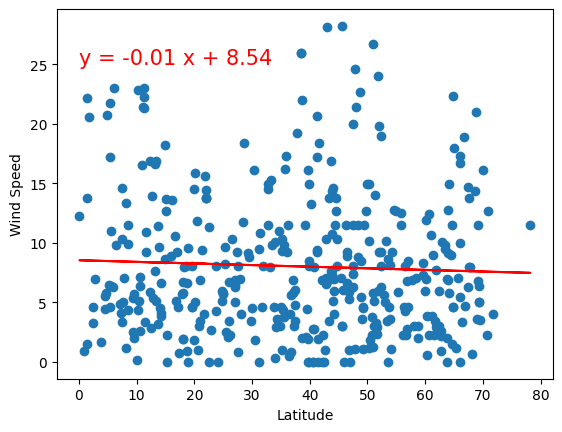

In [153]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linreg(x_values, y_values, 'Wind Speed', (0, 25))

The r-value is: -0.20438262198058876


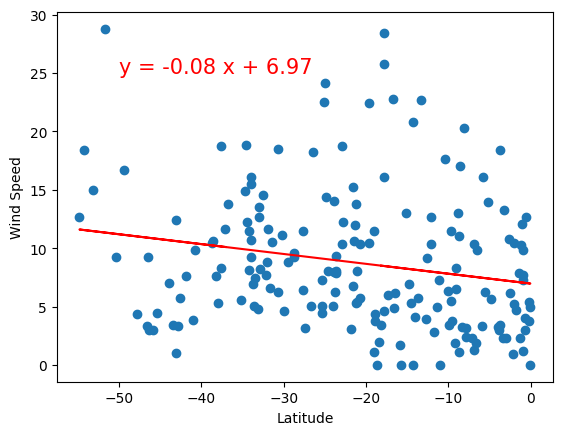

In [151]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linreg(x_values, y_values, 'Wind Speed', (-50, 25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE